In [1]:
from tools import analysistools as atools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import random
from scipy.stats import sem
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.spatial import distance_matrix
import networkx as nx

#import hurst

In [2]:
xyzapath = '/Users/joelforster/Projects/optidb/clus/rebuilds'

In [3]:
xyzas = [os.path.join(xyzapath,f) for f in filter(lambda x: '.xyza' in x, os.listdir(xyzapath))]

In [4]:
nxyzas = filter(lambda c: '-1' in c, xyzas)
bxyzas = filter(lambda c: '-1' not in c, xyzas)

In [5]:
# contacts = [atools.measureLigandContact(f) for f in random.sample(xyzas,10)]

In [6]:
nonBudContacts = [atools.measureLigandContact(f) for f in random.sample(nxyzas,10)]
budContacts = [atools.measureLigandContact(f) for f in random.sample(bxyzas,10)]

In [7]:
mbcontact = {}
mbcontactlist = []
mberr = []

nbcontact = {}
nbcontactlist = []
nberr = []

if len(budContacts) > 0:
    for x in budContacts[0][0]:
        mbcontact[x[0]] = []
        mbcontactlist.append([x[0],[]])
    for f in budContacts:
        for g in f[0]:
            mbcontact[g[0]].append(g[1])
    for v in mbcontactlist:
        v[1] = np.mean(mbcontact[v[0]])
        mberr.append([v[0],np.std(mbcontact[v[0]])])
    
if len(nonBudContacts) > 0:
    for x in nonBudContacts[0][0]:
        nbcontact[x[0]] = []
        nbcontactlist.append([x[0],[]])
    for f in nonBudContacts:
        for g in f[0]:
            nbcontact[g[0]].append(g[1])
    for v in nbcontactlist:
        v[1] = np.mean(nbcontact[v[0]])
        nberr.append([v[0],np.std(nbcontact[v[0]])])

mbcontact = {}
nbcontact = {}

<Container object of 3 artists>

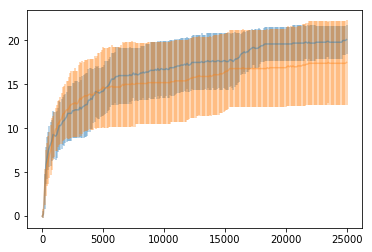

In [8]:
plt.errorbar([p[0] for p in mbcontactlist],[p[1] for p in mbcontactlist],yerr=[p[1] for p in mberr],alpha=0.4)
plt.errorbar([p[0] for p in nbcontactlist],[p[1] for p in nbcontactlist],yerr=[p[1] for p in nberr],alpha=0.4)
# for contact in nonBudContacts:
#     plt.plot([i[0] for i in contact[0]],[i[1] for i in contact[0]],color='blue')

In [9]:
njitters = [atools.jitterLigandContact(c[0],3,'full') for c in nonBudContacts]
bjitters = [atools.jitterLigandContact(c[0],3,'full') for c in budContacts]

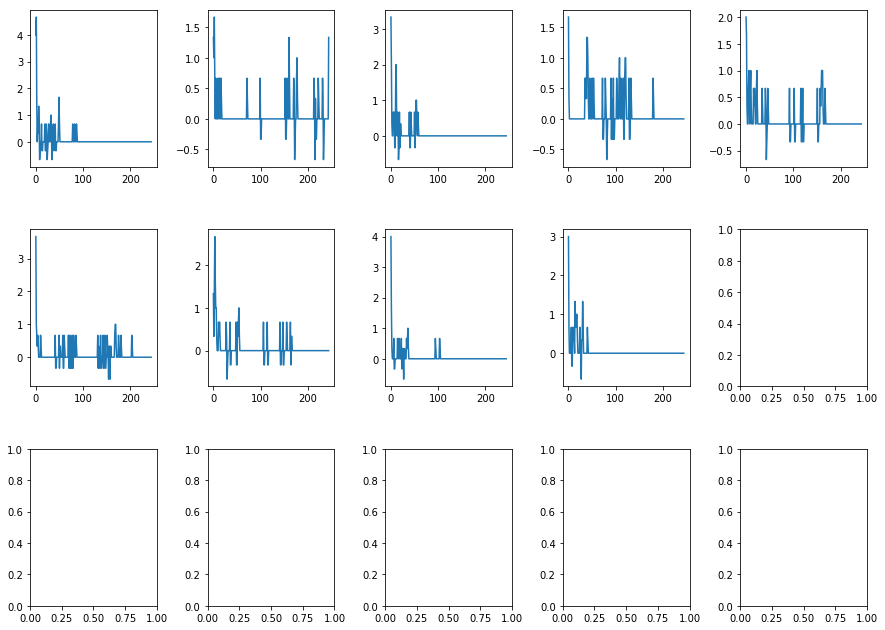

In [10]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(1,16):
    ax = plt.subplot(4, 5, i)
    if len(bjitters)>i:
        ax.plot(bjitters[i][1])


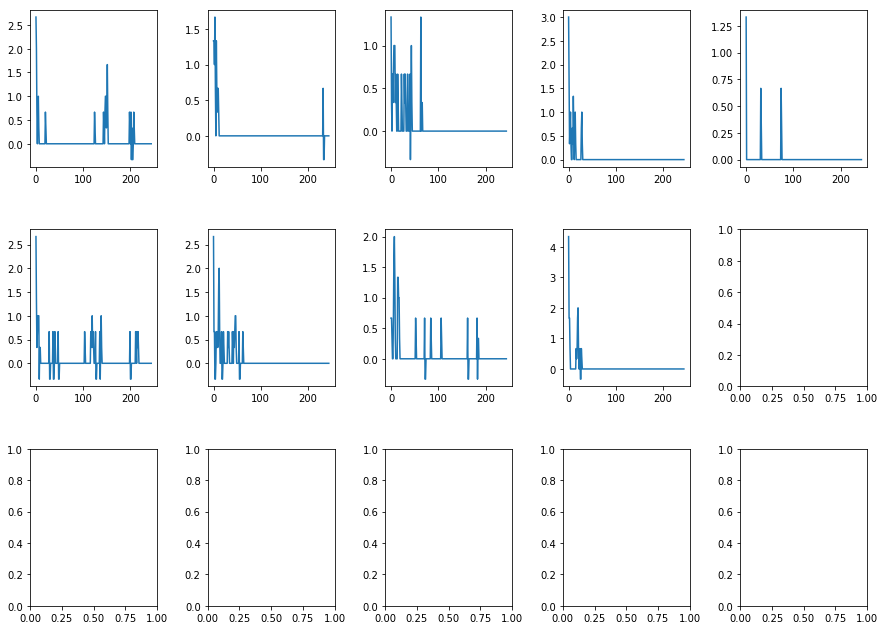

In [11]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(1,16):
    ax = plt.subplot(4, 5, i)
    if len(njitters) > i:
        ax.plot(njitters[i][1])

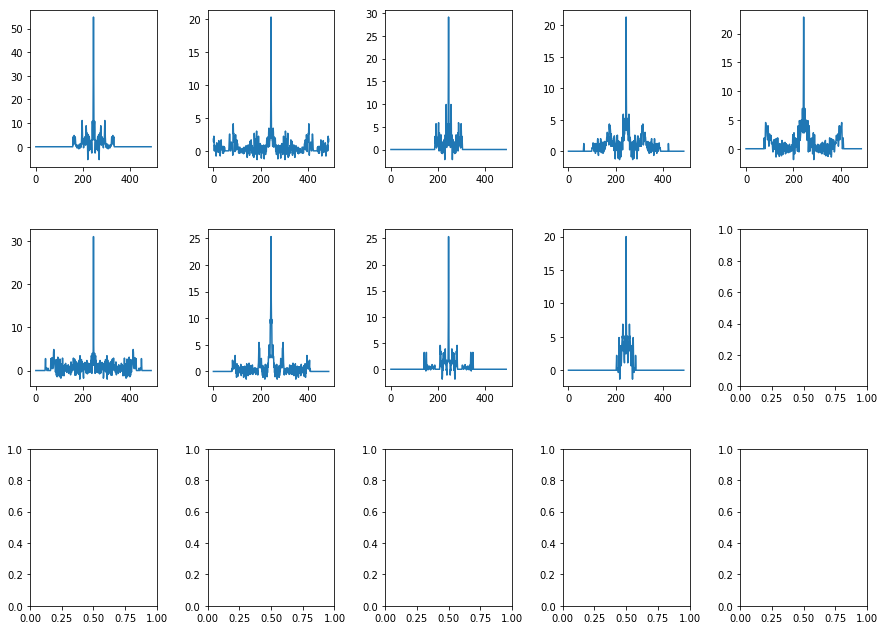

In [12]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(1,16):
    ax = plt.subplot(4, 5, i)
    if len(bjitters) > i:
        corr = np.correlate(bjitters[i][1],bjitters[i][1],mode='full')
        ax.plot(corr)

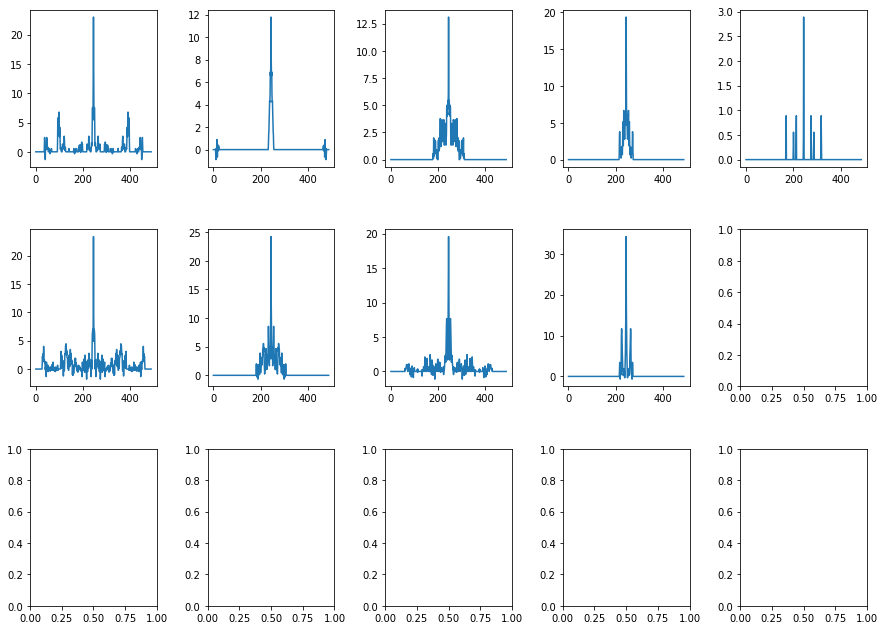

In [13]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(1,16):
    ax = plt.subplot(4, 5, i)
    if len(njitters) > i:
        corr = np.correlate(njitters[i][1],njitters[i][1],mode='full')
        ax.plot(corr)

/Users/joelforster/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


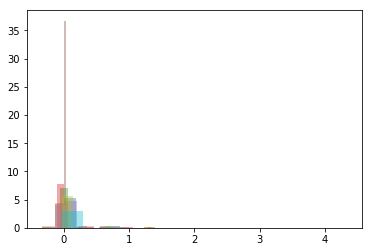

In [14]:
nmeans = []
nsds = []
for c in njitters:
    sns.distplot(c[1][:],kde=False,norm_hist=True)
    nmeans.append(np.mean(c[1]))
    nsds.append(np.std(c[1]))

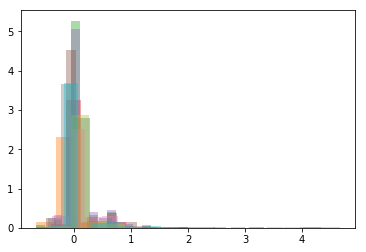

In [15]:
bmeans = []
bsds = []
for c in bjitters:
    sns.distplot(c[1][:],kde=False,norm_hist=True)
    bmeans.append(np.mean(c[1]))
    bsds.append(np.std(c[1]))

In [16]:
print(np.mean(bmeans),np.mean(nmeans))

(0.07346938775510226, 0.06163265306122469)


In [17]:
print(np.mean(bsds),np.mean(nsds))

(0.3316885567199368, 0.2694519972448267)


In [18]:
def getRotationData(simData):
    coreId = -1
    refId = -1
    for i,a in enumerate(simData['steps'][0]['data']):
        if a['type'] == 2:
            coreId = i
        if a['type'] == 3:
            refId = i

    r = []
    rotation = []
    
    for i,s in enumerate(simData['steps']):
        core = s['data'][coreId]
        ref = s['data'][refId]
        vCore = [core['x'],core['y'],core['z']]
        vRef = [ref['x'],ref['y'],ref['z']]
        r.append(np.subtract(vRef,vCore))
        if i>0:
            rotation.append(r[-1])
            
    return rotation

In [19]:
def getPolarRotationData(simData):
    rotation = getRotationData(simData)
    return [atools.crt2SphPol(r) for r in rotation]

In [20]:
def getAngularDisplacement(simData):
    rotation = getPolarRotationData(simData)
    return [np.subtract(r,rotation[0]) for r in rotation]

In [21]:

def getDisplacement(simData):
    rotation = getRotationData(simData)
    return [np.subtract(r,rotation[0]) for r in rotation]

In [22]:
def plotRotationTrajectory(data):
    colors = []
    colStep = 1.0/float(len(data))
    for i in range(len(data)):
        colors.append((colStep*i,0.0,1.0-colStep*i,1.0))
        
    startPoint = 0
    X, Y, Z = zip(*data[startPoint:])
    fig = plt.figure(figsize=(13, 9))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(X,Y,Z,alpha=0.4)
    ax.scatter(X, Y, Z,c=colors[startPoint:])
    return fig

In [23]:
def plotRotationTrajectoryOnSphere(data):
    colors = []
    colStep = 1.0/float(len(data))
    for i in range(len(data)):
        colors.append((colStep*i,0.0,1.0-colStep*i,1.0))
        
    startPoint = 0
    X, Y, Z = zip(*data[startPoint:])
    fig = plt.figure(figsize=(13, 9))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(X,Y,Z,alpha=0.4)
    ax.set_xlim([-4.0,4.0])
    ax.set_ylim([-4.0,4.0])
    ax.set_zlim([-4.0,4.0])
    u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:200j]
    sx = 4.0*np.cos(u)*np.sin(v)
    sy = 4.0*np.sin(u)*np.sin(v)
    sz = 4.0*np.cos(v)
    ax.plot_wireframe(sx, sy, sz, color="r",alpha=0.05)
    ax.scatter(X, Y, Z,c=colors[startPoint:])
    return fig

In [25]:
d = atools.readXYZA(bxyzas[1])

In [27]:
for i in range(10 if len(bxyzas) > 10 else len(bxyzas)):
    r = getRotationData(atools.readXYZA(bxyzas[i]))
    rc = np.corrcoef([p[0] for p in r])
    tc = np.corrcoef([p[1] for p in r])
    pc = np.corrcoef([p[2] for p in r])
    print rc,tc,pc
    
        

1.0 1.0 1.0
1.0 1.0 1.0
1.0 1.0 1.0
1.0 1.0 1.0
1.0 1.0 1.0
1.0 1.0 1.0
1.0 1.0 1.0
1.0 1.0 1.0
1.0 1.0 1.0
1.0 1.0 1.0


In [29]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)

rows = 3

for i in range(rows):
    if i in bxyzas:
        r = getRotationData(readXYZA(bxyzas[i]))
        ax = plt.subplot(3, rows, i*3+1)
        corr = np.correlate([p[0] for p in r], [p[0] for p in r], mode='same')
        ax.plot(corr)
        ax = plt.subplot(3, rows, i*3+2)
        corr = np.correlate([p[1] for p in r], [p[1] for p in r], mode='full')
        ax.plot(corr)
        ax = plt.subplot(3, rows, i*3+3)
        corr = np.correlate([p[2] for p in r], [p[2] for p in r], mode='full')
        ax.plot(corr)
#     plotRotationTrajectory(r)
plt.show()

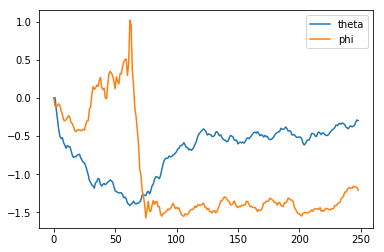

In [31]:
rotation = getAngularDisplacement(atools.readXYZA(random.sample(bxyzas,1)[-1]))
#plt.plot([r[0] for r in rotation],label="r")
plt.plot([r[1] for r in rotation],label="theta")
plt.plot([r[2] for r in rotation],label="phi")
plt.legend()
plt.show()


In [32]:
# H, c, data = hurst.compute_Hc([r[1] for r in rotation])
# print H
# H, c, data = hurst.compute_Hc([r[2] for r in rotation])
# print H

NameError: name 'hurst' is not defined

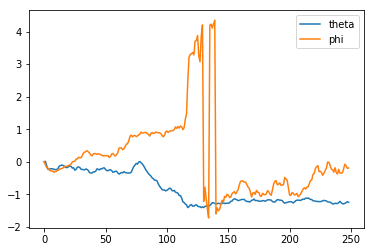

In [34]:
rotation = getAngularDisplacement(atools.readXYZA(random.sample(bxyzas,1)[-1]))
#plt.plot([r[0] for r in rotation],label="r")
plt.plot([r[1] for r in rotation],label="theta")
plt.plot([r[2] for r in rotation],label="phi")
plt.legend()
plt.show()

In [35]:
# H, c, data = hurst.compute_Hc([r[1] for r in rotation])
# print H
# H, c, data = hurst.compute_Hc([r[2] for r in rotation])
# print H

In [37]:
traj = getRotationData(atools.readXYZA(bxyzas[-1]))

In [205]:
maxSample = min(len(bxyzas),len(nxyzas))

In [261]:
def getCorrs(traj,deltas):
    corrs = []
    trajvectors = [t-traj[i] for i,t in enumerate(traj[1:])]
    for d in range(deltas):
        corr = getCorr(trajvectors,d)
        corrs.append(corr)
    return corrs

In [248]:
def getCorr(trajvectors,delta):
    trajcorr = [np.dot(t,trajvectors[i+delta]) for i,t in enumerate(trajvectors[1:len(trajvectors)-delta-1])]
    corr = np.mean(trajcorr)
    return corr

In [381]:
samplesize = maxSample
deltas = 9

In [ ]:
for b in random.sample(bxyzas,samplesize):
    traj = getRotationData(atools.readXYZA(b))

In [323]:
bcorrs = []
for d in range(deltas):
        bcorrs.append([])
        
for i, c in enumerate(getCorrs(traj,deltas)):
    bcorrs[i].append(c)

print bcorrs

[[0.005677544005107309], [0.023490526889077996], [0.005359489588436892], [0.0018371599602370293], [0.0006574802796615174], [0.00040262744586245993], [-0.0009474457801174807], [-0.0008057744111728731], [0.001820715149643063], [0.0007766907730731863], [0.001266560473396538], [0.0031260814226878176], [-0.00030007368834373497], [-0.0006854069689444772], [-0.0003302678379689888], [-0.0017704482916164823], [-0.0031130553914549466], [-0.0010865163977303808], [-0.0005264926572040781], [0.0004879810130803607], [0.00013540939625221915], [0.0009151682063271893], [-0.00033505521499650276], [-0.00043936688312315756], [-0.00015977788523305887]]


In [327]:
SAMPLEDATA = getRotationData(atools.readXYZA(bxyzas[-1]))

SUMMARY AND ANALYSIS

In [382]:
def generateSummary(traj):
    summ = {}
    corrs = getCorrs(traj,deltas)
    trajdisplacement = [np.linalg.norm(t-traj[0]) for i,t in enumerate(traj[1:])]
    trajmsd = [t*t for t in trajdisplacement]
    
    G = pointCloudToDistanceGraph(traj)

    #REMOVE THIS NEXT TIME YOU LOAD THE KERNEL!
    for u,v,d in G.edges(data=True):
        d['weight']=1.0/d['weight']
        
    G=pruneNetwork(G,2.0)
    den = nx.density(G)
    clus = nx.average_clustering(G)
    
    summ['corrs'] = corrs
    summ['msd'] = trajmsd
    summ['graph'] = G
    summ['density'] = den
    summ['clustering'] = clus
    return summ

In [383]:
bsummary = {}
nsummary = {}

for b in random.sample(bxyzas,samplesize):
    bsummary[b] = {}
    traj = getRotationData(atools.readXYZA(b))
    summ = generateSummary(traj)
    bsummary[b] = summ
    
for n in random.sample(nxyzas,samplesize):
    nsummary[n] = {}
    traj = getRotationData(atools.readXYZA(n))
    summ = generateSummary(traj)
    nsummary[n] = summ
    


In [384]:
bcorrs = []
bDen = []
bClus = []
bmsd = []
for d in range(deltas):
        bcorrs.append([])
        
for k,v in bsummary.iteritems():
    for i,d in enumerate(v['corrs']):
        bcorrs[i].append(d)
    bDen.append(v['density'])
    bClus.append(v['clustering'])
    bmsd = [bmsd[i]+t for i,t in enumerate(v['msd'])] if len(bmsd) > 0 else [t for i,t in enumerate(v['msd'])
                                                                            ]
bmsd = [t/float(samplesize) for t in bmsd]



ncorrs = []
nDen = []
nClus = []
nmsd = []
for d in range(deltas):
        ncorrs.append([])
        
for k,v in nsummary.iteritems():
    for i,d in enumerate(v['corrs']):
        ncorrs[i].append(d)
    nDen.append(v['density'])
    nClus.append(v['clustering'])
    nmsd = [nmsd[i]+t for i,t in enumerate(v['msd'])] if len(nmsd) > 0 else [t for i,t in enumerate(v['msd'])
                                                                            ]
nmsd = [t/float(samplesize) for t in nmsd]

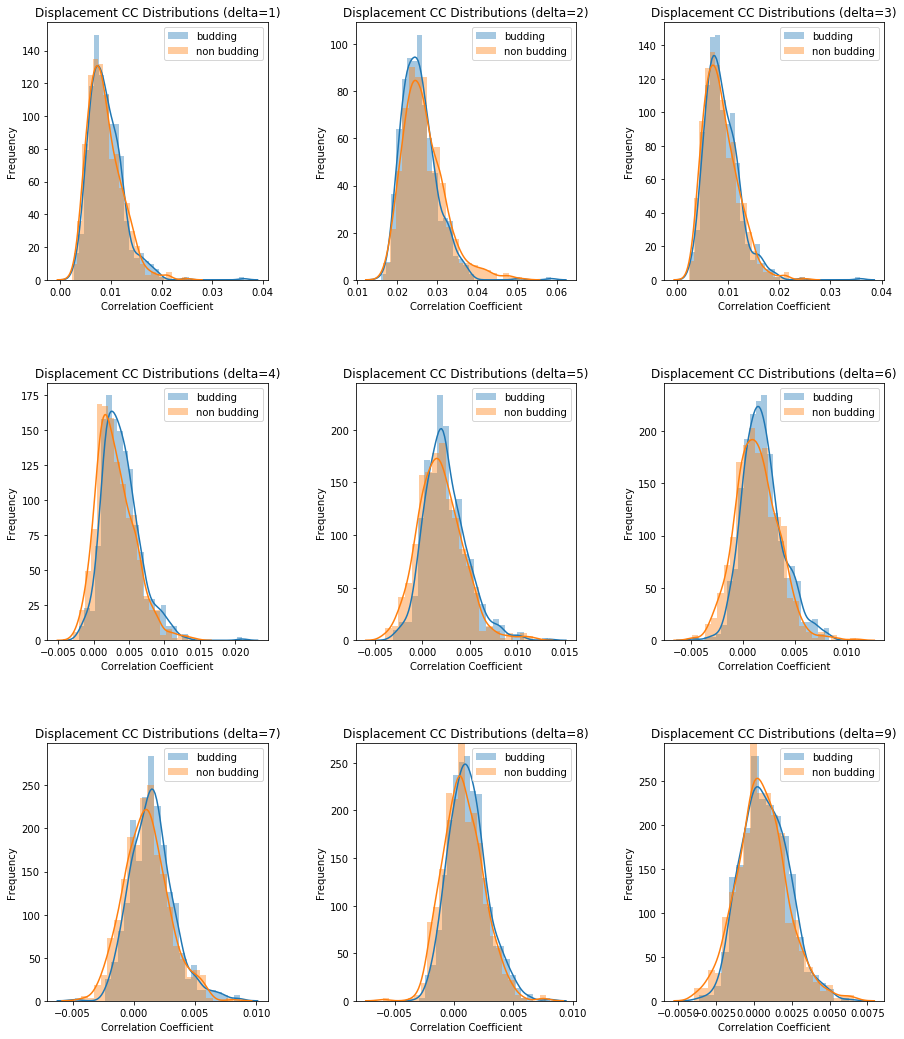

In [392]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(deltas*2)
fig.set_figwidth(15)
minCorr = 1e8
maxCorr = -1e8
for delta in range(deltas):
    minCorr = np.min([np.min(bcorrs[delta]),np.min(ncorrs[delta]),minCorr])
    maxCorr = np.max([np.max(bcorrs[delta]),np.max(ncorrs[delta]),maxCorr])
    minCorr = minCorr - minCorr*0.5
    maxCorr = maxCorr - maxCorr*0.25
for delta in range(deltas):
    ax = plt.subplot(int(np.ceil(float(deltas)*0.33)), 3, delta+1)
#     ax.set_xlim([minCorr-0.01,maxCorr+0.01])
#     ax.set_ylim([minCorr-0.01,maxCorr+0.01])
    sns.distplot(bcorrs[delta],label="budding",norm_hist=True)
    sns.distplot(ncorrs[delta],label="non budding",norm_hist=True)
    ax.set_title('Displacement CC Distributions (delta='+str(delta+1)+')')
    ax.set_xlabel('Correlation Coefficient')
    ax.set_ylabel('Frequency')
    ax.legend()
plt.show()

In [399]:
import pickle

with open('/Users/joelforster/Projects/optidb/clus/nonbudding.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(nsummary, f, pickle.HIGHEST_PROTOCOL)

In [400]:
with open('/Users/joelforster/Projects/optidb/clus/budding.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(bsummary, f, pickle.HIGHEST_PROTOCOL)

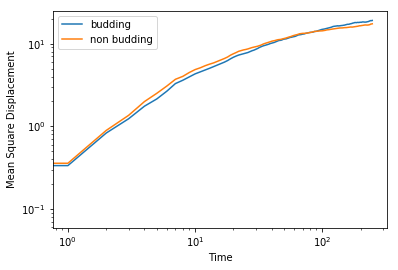

In [386]:
plt.loglog(bmsd,label='budding')
plt.loglog(nmsd,label='non budding')
plt.ylabel('Mean Square Displacement')
plt.xlabel('Time')
plt.legend()
plt.show()

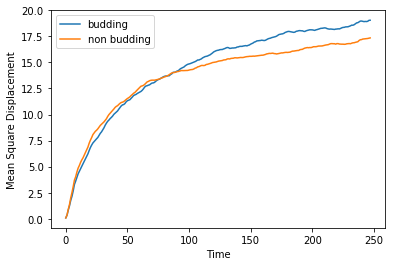

In [387]:
plt.plot(bmsd,label='budding')
plt.plot(nmsd,label='non budding')
plt.ylabel('Mean Square Displacement')
plt.xlabel('Time')
plt.legend()
plt.show()

In [230]:
def orthoProjection(data,scale=1.0,offset=0.0):
    #uses orthographic projection
    ortho = []
    for d in data:
        b = []
        b.append(scale*d[0] + offset)
        b.append(scale*d[2] + offset)
        ortho.append(b)
    return ortho
        

In [231]:
def pointCloudToPositionDictionary(data):
    posDict = {}
    for i,d in enumerate(orthoProjection(data)):
        posDict[i] = d
    return posDict

In [232]:
rdata = getRotationData(atools.readXYZA(bxyzas[-2]))


In [233]:
import copy
def pruneNetwork(G,pruning):
    prunes = []
    pruneNodes = []
    GP = copy.deepcopy(G)
    maxW = 0
    if len(G.nodes()) > 0 and 'weight' in G.nodes(data=True)[0]:
        for n,w in G.nodes(data=True):
            if w['weight'] <= 0.0:
                pruneNodes.append(n)

    if len(G.edges()) > 0:
        for e in GP.edges:
            w = GP.get_edge_data(*e)['weight']
            if(w<=pruning):
                prunes.append(e)

    GP.remove_edges_from(prunes)
    GP.remove_nodes_from(pruneNodes)
    return GP

In [234]:
def pointCloudToDistanceGraph(data, removeSelfEdges=True, inverse=False):
    #the full package - turns a cloud of xyz points into a networkx graph with distances scaled by linear distance
    dists = atools.pointCloudToDistanceMatrix(data)
    dt = [('weight',float)]
    A=np.matrix(dists,dtype=dt)
    G = nx.from_numpy_matrix(A)
    if removeSelfEdges:
        G = atools.removeSelfLoops(G)
    return G

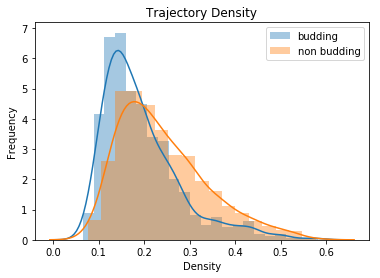

In [388]:
plt.title('Trajectory Density')
plt.xlabel('Density')
plt.ylabel('Frequency')
sns.distplot(bDen,label='budding')
sns.distplot(nDen,label='non budding')
plt.legend()
plt.show()

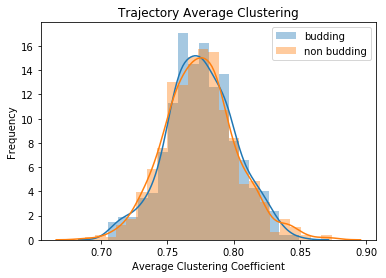

In [389]:
plt.title('Trajectory Average Clustering')
plt.xlabel('Average Clustering Coefficient')
plt.ylabel('Frequency')
sns.distplot(bClus,label='budding')
sns.distplot(nClus,label='non budding')
plt.legend()
plt.show()

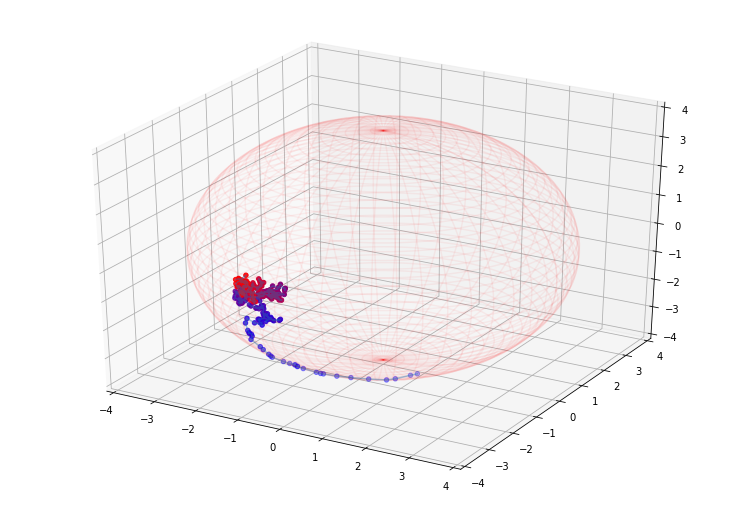

In [239]:
plotRotationTrajectoryOnSphere(getRotationData(atools.readXYZA(bxyzas[-2])))
plt.show()

In [43]:
bData = getRotationData(readXYZA(bxyzas[-1]))

In [66]:
budHurst = []
for b in bxyzas:
    rotation = getAngularDisplacement(readXYZA(b))
    H1, c1, data1 = hurst.compute_Hc([r[1] for r in rotation])
    H2, c2, data2 = hurst.compute_Hc([r[2] for r in rotation])
    budHurst.append([H1,H2])

In [67]:
nonHurst = []
for n in nxyzas:
    rotation = getAngularDisplacement(readXYZA(n))
    H1, c1, data1 = hurst.compute_Hc([r[1] for r in rotation])
    H2, c2, data2 = hurst.compute_Hc([r[2] for r in rotation])
    nonHurst.append([H1,H2])

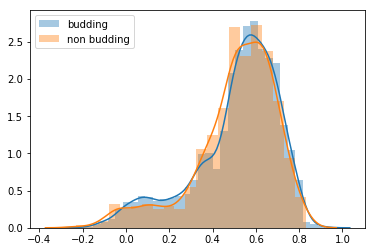

In [68]:
sns.distplot([b[1] for b in budHurst],label="budding")
sns.distplot([b[1] for b in nonHurst],label="non budding")
plt.legend()
plt.show()

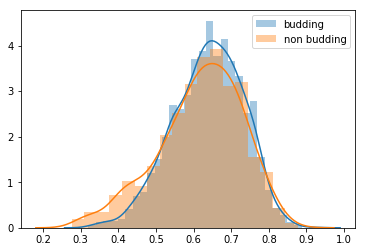

In [69]:
sns.distplot([b[0] for b in budHurst],label="budding")
sns.distplot([b[0] for b in nonHurst],label="non budding")
plt.legend()
plt.show()

In [72]:
from scipy import stats
print stats.ttest_ind([b[0] for b in budHurst],[b[0] for b in nonHurst])

Ttest_indResult(statistic=4.530998263014185, pvalue=6.109721895608975e-06)


In [73]:
print stats.ttest_ind([b[1] for b in budHurst],[b[1] for b in nonHurst])

Ttest_indResult(statistic=0.5903787833877695, pvalue=0.5549830841588728)


In [87]:
zooparticles = ["/Users/joelforster/Projects/optihedron/out/sim_gs_264_"+str(i)+"_out.xyza" for i in range(4)]

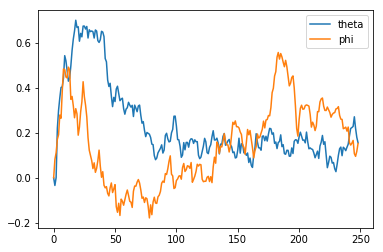

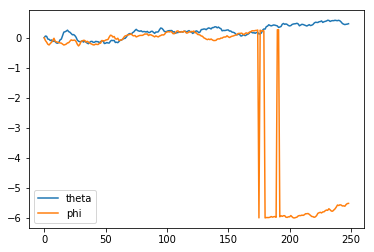

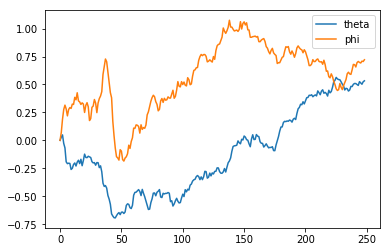

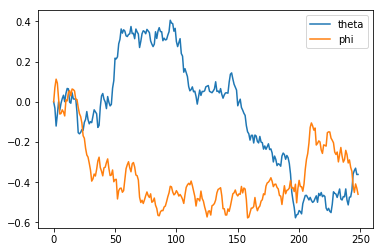

In [89]:
zooHurst = []
for i in zooparticles:
    rotation = getAngularDisplacement(readXYZA(i))
    H1, c1, data1 = hurst.compute_Hc([r[1] for r in rotation])
    H2, c2, data2 = hurst.compute_Hc([r[2] for r in rotation])
    zooHurst.append([H1,H2])
    #plt.plot([r[0] for r in rotation],label="r")
    plt.plot([r[1] for r in rotation],label="theta")
    plt.plot([r[2] for r in rotation],label="phi")
    plt.legend()
    plt.show()

In [90]:
print zooHurst

[[0.5238625977744695, 0.4673762310701783], [0.4864782949019711, 0.16464419169039737], [0.6499050708792441, 0.566026937290961], [0.6326896557098346, 0.505986462401568]]
